# 데이터마이닝 HW03
## <div style="text-align: right"> 201822037 통계학과 한민주 </div>

### 3. `Carseats.csv`를 이용한 Sales(매출액) 예측

In [21]:
library(rpart)  ## Recursive Partitioning and Regression Trees
library(rpart.plot)  ## 그림용
library(tree)
library(ISLR2)

In [7]:
Carseats = read.csv("Carseats.csv")  ## 데이터 불러오기
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [22]:
str(Carseats)
# ?Carsetas

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : int  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : int  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: int  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : int  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : int  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : chr  "Bad" "Good" "Medium" "Medium" ...
 $ Age        : int  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : int  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ US         : chr  "Yes" "Yes" "Yes" "Yes" ...


| 변수 | 설명 | 
|-| - | 
|`Sales` | 매출액 | 
|`CompPrice` | 경쟁 업체가 청구한 가격 |
|`Income` | 지역 사회 소득 수준 | 
|`Advertising` | 광고 예산 | 
|`Population` | 인구 규모 | 
|`Price` | 카시트에 대한 가격 | 
|`ShelveLoc` | 카시트 선반 위치의 품질 |
|`Age` | 지역 인구의 평균 연령 |
|`Education` | 각 지역의 교육 수준 |
|`Urban` | 상점이 도시에 위치해 있는지 여부 |
|`US` | 상점이 미국에 있는지 여부 |

#### (a) training data (60%)와 testing data(40%) 분리

In [233]:
sum(is.na(Carseats)) ## NA 없음

[1] 0

In [29]:
set.seed(1000)

In [30]:
train_id = sample(1:nrow(Carseats) , nrow(Carseats)*0.6)

In [31]:
train_dt = Carseats[train_id,]
test_dt = Carseats[-train_id,]

#### (b) training data를 이용하여 회귀트리 적합

In [40]:
tree = rpart(Sales ~., data = train_dt ,
                 control = rpart.control(cp=0.01 , minsplit=5))
## cp = a = 0.01
tree

n= 240 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 240 2016.004000  7.422042  
   2) ShelveLoc=Bad,Medium 190 1134.042000  6.649211  
     4) Price>=92.5 165  807.563300  6.231455  
       8) ShelveLoc=Bad 52  186.079000  4.946154  
        16) Income< 98.5 40  107.313200  4.479000  
          32) CompPrice< 104.5 3    2.350467  1.773333 *
          33) CompPrice>=104.5 37   81.220100  4.698378 *
        17) Income>=98.5 12   40.938870  6.503333 *
       9) ShelveLoc=Medium 113  496.049300  6.822920  
        18) Price>=124.5 47  176.587300  5.704043  
          36) Age>=60.5 15   63.895370  4.505333  
            72) Income< 64 9   14.640000  3.203333 *
            73) Income>=64 6   11.113280  6.458333 *
          37) Age< 60.5 32   81.035170  6.265937  
            74) CompPrice< 138.5 21   38.322780  5.649048 *
            75) CompPrice>=138.5 11   19.464050  7.443636 *
        19) Price< 124.5 66  218.723000  7.619697  
          38) CompPrice< 115.5 

- terminal node의 개수 : 18개

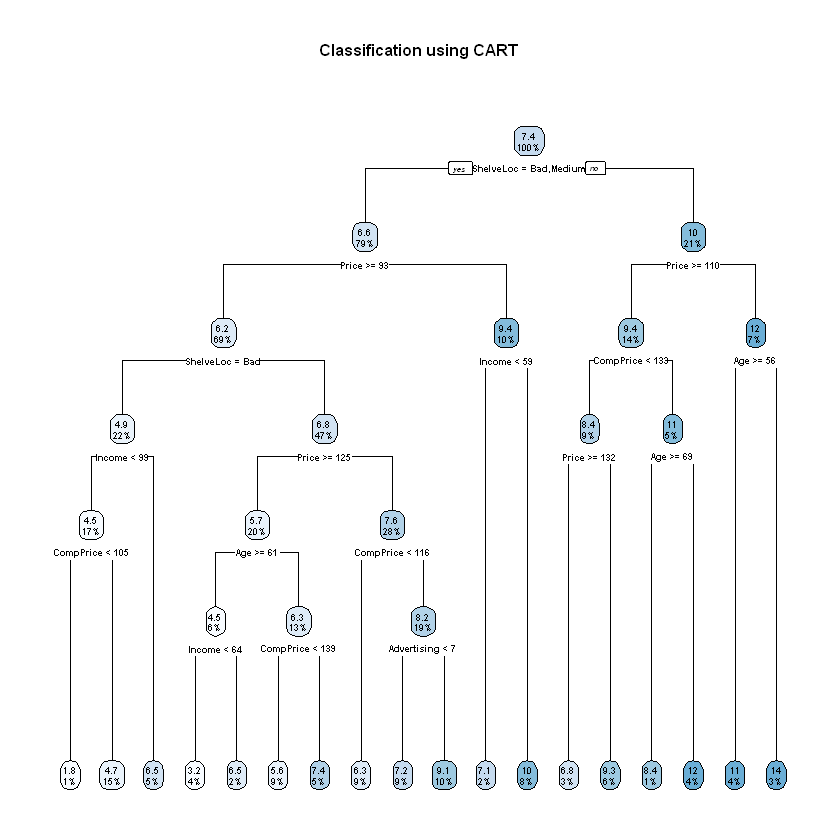

In [45]:
rpart.plot(tree , main = "Classification using CART")

- 각 노드에 분류된 값의 평균이 써져있음.

In [41]:
summary(tree)

Call:
rpart(formula = Sales ~ ., data = train_dt, control = rpart.control(cp = 0.01, 
    minsplit = 5))
  n= 240 

           CP nsplit rel error    xerror       xstd
1  0.27019208      0 1.0000000 1.0066296 0.09041068
2  0.10855540      1 0.7298079 0.7411019 0.06192960
3  0.06221955      2 0.6212525 0.6922175 0.06086798
4  0.05257685      3 0.5590330 0.7042091 0.06239184
5  0.04996964      4 0.5064561 0.6927962 0.06160494
6  0.03139894      5 0.4564865 0.6699297 0.05864856
7  0.02603478      6 0.4250875 0.6596301 0.05684445
8  0.02111851      7 0.3990528 0.6104254 0.05537428
9  0.01876335      8 0.3779343 0.6009558 0.05396750
10 0.01731119      9 0.3591709 0.5951121 0.05395512
11 0.01595247     11 0.3245485 0.6236529 0.05469277
12 0.01566128     12 0.3085960 0.6229629 0.05458116
13 0.01523314     13 0.2929348 0.6236853 0.05462882
14 0.01450737     14 0.2777016 0.6300685 0.05528600
15 0.01177705     15 0.2631943 0.6212439 0.05365901
16 0.01153189     16 0.2514172 0.6114978 0.05217175


In [46]:
tree$variable.importance ##변수 중요도, 실제 지니를 얼마나 줄였는지 기여도

ShelveLoc       Price   CompPrice      Income         Age Advertising 
  670.14327   497.56878   264.73563   171.09419   146.76714    89.72177 
 Population   Education          US 
   81.56118    61.52257    30.41071

In [75]:
printcp(tree) ## complexity parameter


Regression tree:
rpart(formula = Sales ~ ., data = train_dt, control = rpart.control(cp = 0.01, 
    minsplit = 5))

Variables actually used in tree construction:
[1] Advertising Age         CompPrice   Income      Price       ShelveLoc  

Root node error: 2016/240 = 8.4

n= 240 

         CP nsplit rel error  xerror     xstd
1  0.270192      0   1.00000 1.00663 0.090411
2  0.108555      1   0.72981 0.74110 0.061930
3  0.062220      2   0.62125 0.69222 0.060868
4  0.052577      3   0.55903 0.70421 0.062392
5  0.049970      4   0.50646 0.69280 0.061605
6  0.031399      5   0.45649 0.66993 0.058649
7  0.026035      6   0.42509 0.65963 0.056844
8  0.021119      7   0.39905 0.61043 0.055374
9  0.018763      8   0.37793 0.60096 0.053967
10 0.017311      9   0.35917 0.59511 0.053955
11 0.015952     11   0.32455 0.62365 0.054693
12 0.015661     12   0.30860 0.62296 0.054581
13 0.015233     13   0.29293 0.62369 0.054629
14 0.014507     14   0.27770 0.63007 0.055286
15 0.011777     15   0.2631

- 0.010000부터 시작, 분류 17번 발생, xerror(오분류율) 0.60752
- 제일 작은 오분류율은 0.59511 이므로 9번 split하면 된다.
- cp 정하는 법 :  xerror + xstd = 0.59511 + 0.053955 = 0.649 , 이 0.649 xerror 사이에 있는 CP값(0.021119 ~0.026035  ) 아무거나 정해주면 됨 ==> 0.025

In [51]:
0.59511 + 0.053955

[1] 0.649065

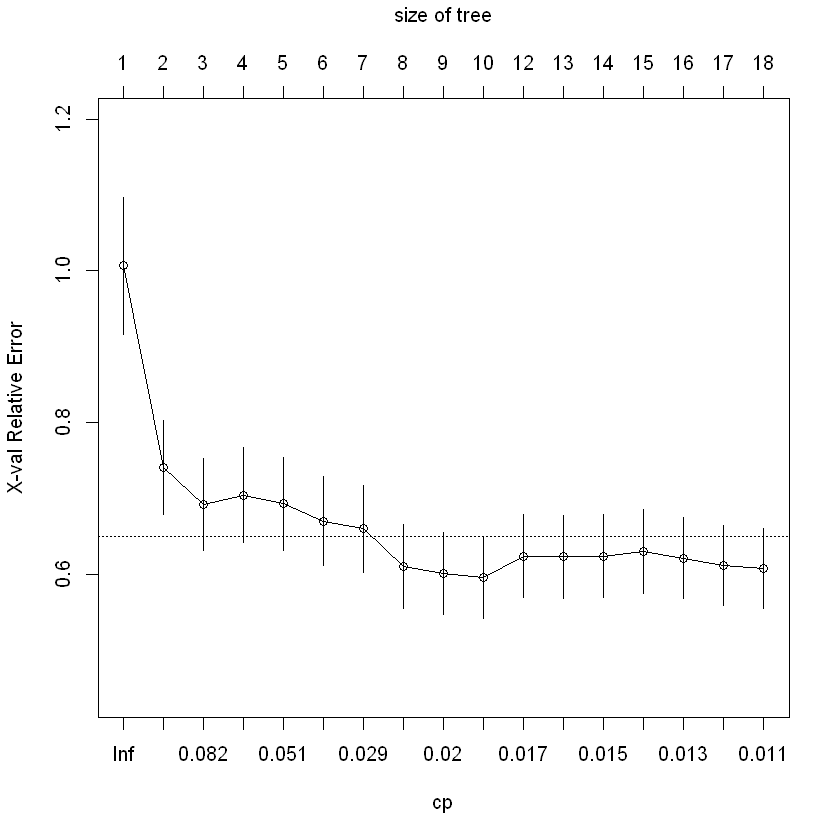

In [50]:
plotcp(tree)

In [61]:
yhat = predict(tree, newdata=test_dt)
head(yhat)

1         2        10        11        12        13 
 4.698378 11.288889  7.189048  4.698378 14.014286  3.203333

In [63]:
mean((yhat-test_dt$Sales)^2)  ## test MSE

[1] 4.421183

#### (c) 가지치기 시행

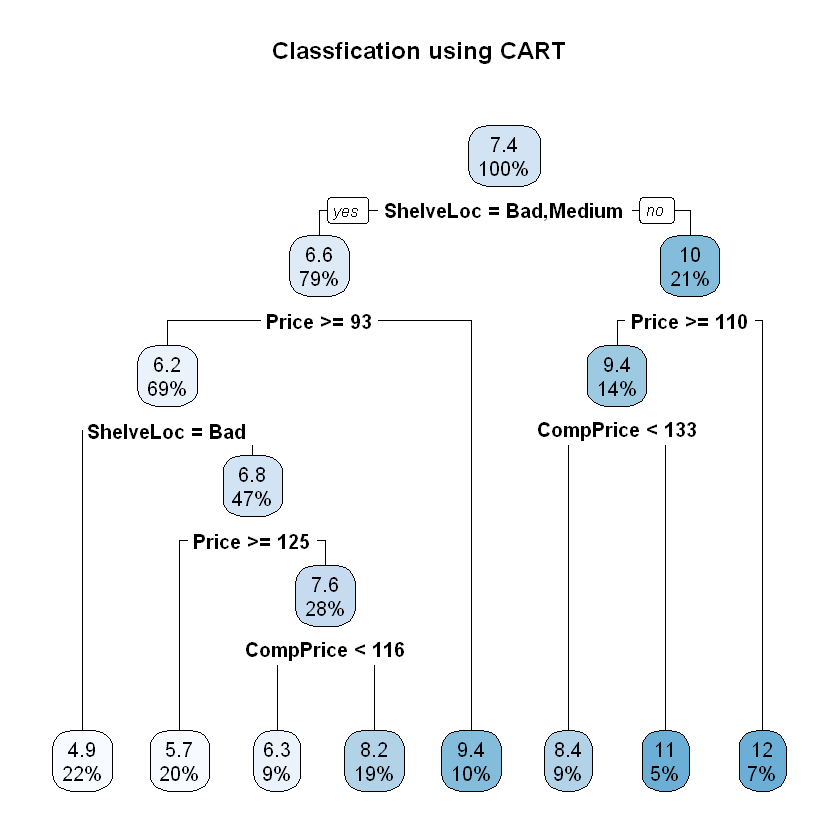

In [53]:
prune_tree = rpart(Sales~. ,data = train_dt , 
                       control = rpart.control(cp=0.025))

rpart.plot(prune_tree, main = "Classfication using CART")

- terminal node 개수 : 8개
- 각 노드에 분류된 값의 평균이 쓰여있음

In [64]:
prune_tree

n= 240 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 240 2016.00400  7.422042  
   2) ShelveLoc=Bad,Medium 190 1134.04200  6.649211  
     4) Price>=92.5 165  807.56330  6.231455  
       8) ShelveLoc=Bad 52  186.07900  4.946154 *
       9) ShelveLoc=Medium 113  496.04930  6.822920  
        18) Price>=124.5 47  176.58730  5.704043 *
        19) Price< 124.5 66  218.72300  7.619697  
          38) CompPrice< 115.5 21   48.74731  6.314286 *
          39) CompPrice>=115.5 45  117.48940  8.228889 *
     5) Price< 92.5 25  107.63040  9.406400 *
   3) ShelveLoc=Good 50  337.25410 10.358800  
     6) Price>=109.5 34  169.33240  9.360000  
      12) CompPrice< 132.5 22   66.31679  8.352273 *
      13) CompPrice>=132.5 12   39.71523 11.207500 *
     7) Price< 109.5 16   61.92657 12.481250 *

In [70]:
yhat = predict(prune_tree, newdata=test_dt)
head(yhat)

1         2        10        11        12        13 
 4.946154 12.481250  8.228889  4.946154 12.481250  5.704043

In [71]:
mean((yhat-test_dt$Sales)^2)  ## test MSE

[1] 4.779485

- 가지치기 전 모델의 test MSE는 4.42 , 가지치기 후 모델의 test MSE는 4.78로 가지치기 시행으로 test MSE는 커졌다.

#### (d)  Bagging 시행

In [72]:
library(randomForest) ##random Forest
library(ipred) ##bagging
library(ggplot2)
library(data.table)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [96]:
bagg = ipredbagg(train_dt$Sales , train_dt[,-1] , nbagg=100 , coob= T)
# y ,x , tree개수 100개(B) , OOB sample error 넣어줌.

In [97]:
bagg


Bagging regression trees with 100 bootstrap replications 
Out-of-bag estimate of root mean squared error:  1.7976 


- OOB에 대한 RMSE 1.7976

In [98]:
pred = predict(bagg , newdata = test_dt)

In [99]:
mean((pred-test_dt$Sales)^2)  ## test MSE

[1] 3.181211

- 배깅을 하니 test MSE가 4.42에서 3.18로 줄어들었다.

#### (e) Random Forest 실행

In [138]:
rf = randomForest(Sales ~. , data = train_dt ,ntree=1000,  mtry =4 , importance =TRUE) 
## tree를 1000개 생성 , 설명변수를 4개씩 선택 , 변수 중요도 계산

In [139]:
rf


Call:
 randomForest(formula = Sales ~ ., data = train_dt, ntree = 1000,      mtry = 4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 4

          Mean of squared residuals: 3.075803
                    % Var explained: 63.38

- 회귀모형
- 1000개의 트리를 씀
- 설명변수 4개씩 선택
- MSE : 3.07
- R-squared : 약 63.38%

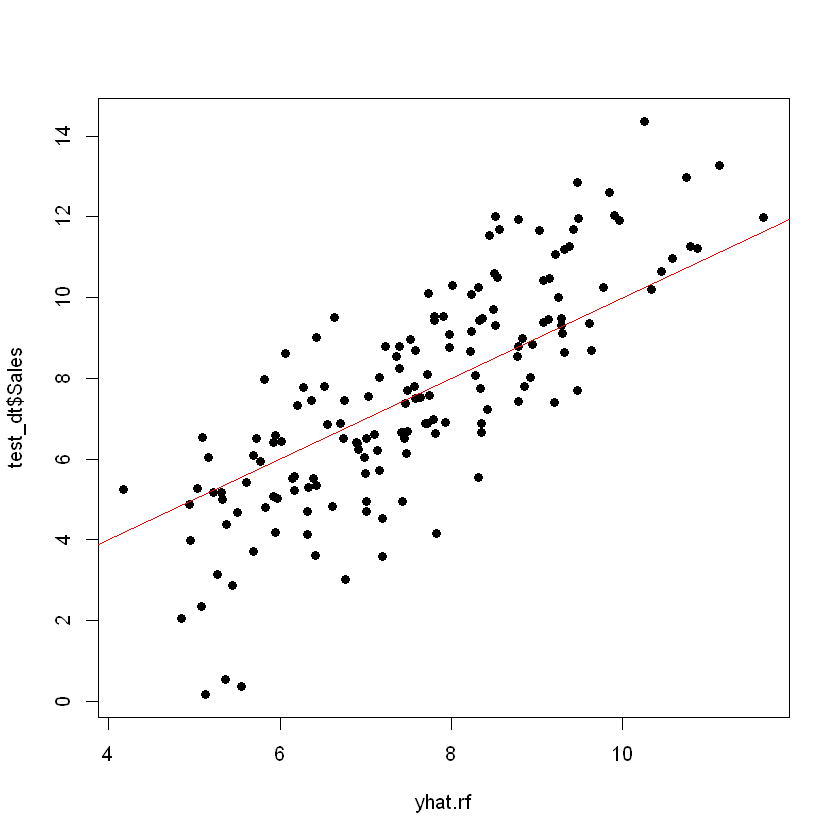

In [140]:
yhat.rf = predict(rf , newdata = test_dt)
plot(yhat.rf , test_dt$Sales , pch =16) ## (예측값 , 실제값)
abline(0,1, col = 'red')

- 값들의 경향이 빨간선과 비슷함 => 잘 예측

In [145]:
mean((yhat.rf - test_dt$Sales )^2) ## test MSE

[1] 2.90308

- 배깅 실행 시 test MSE는 3.18 이었는데, Random Forest를 실행하니 test MSE가 2.9로 줄었다.

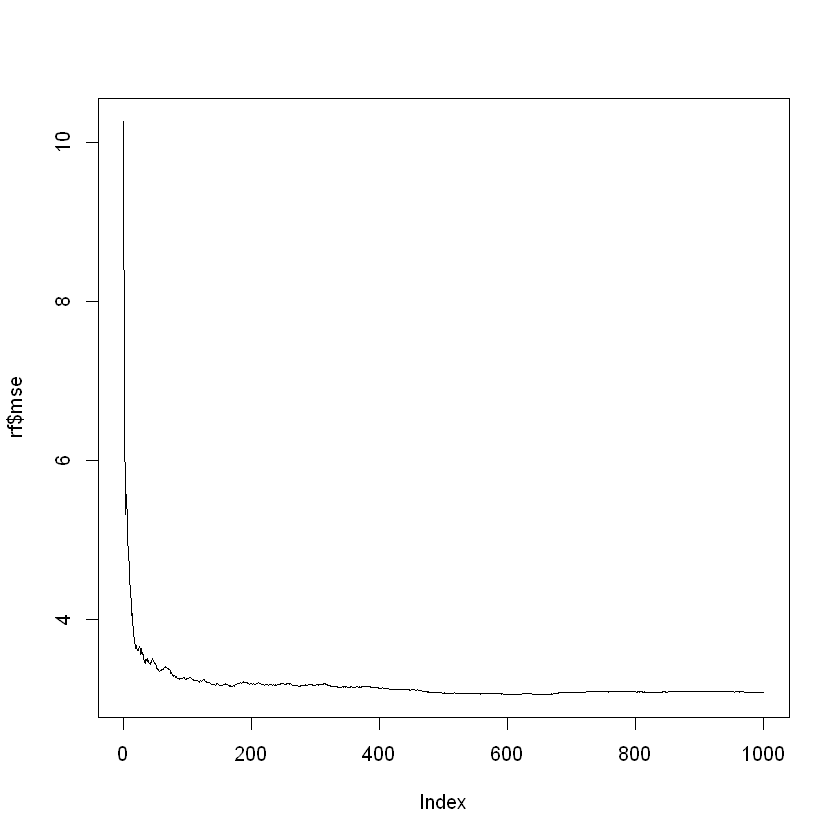

In [142]:
plot(rf$mse  , type='l')

- tree의 수를 증가시킬수록 OOB mse가 줄어든다. 
- 200개의 tree만 써도 MSE가 비슷할 것 같다.

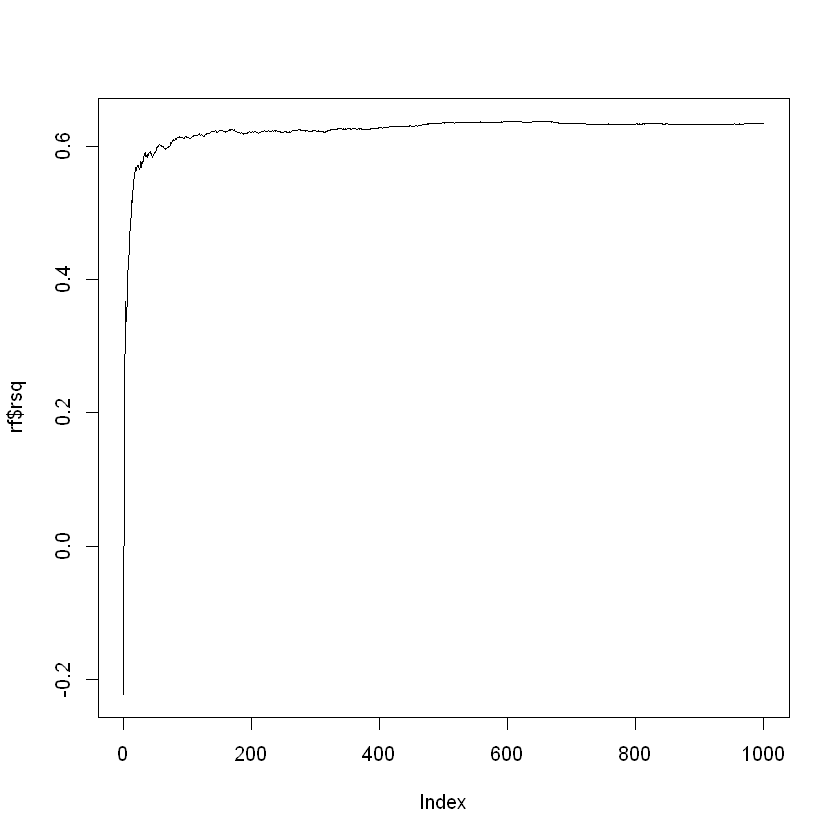

In [147]:
plot(rf$rsq  , type='l')

- $R^2$가 약 60%까지만 상승

,%IncMSE,IncNodePurity
CompPrice,0.732726824,200.91284
Income,0.263549852,169.51607
Advertising,0.863316264,227.08208
Population,0.041281063,111.36178
Price,3.866253549,522.10680
ShelveLoc,3.129333228,384.37759
Age,0.377936635,181.46891
Education,-0.014253026,70.61764
Urban,0.005922898,14.79073
US,0.110064536,32.33856


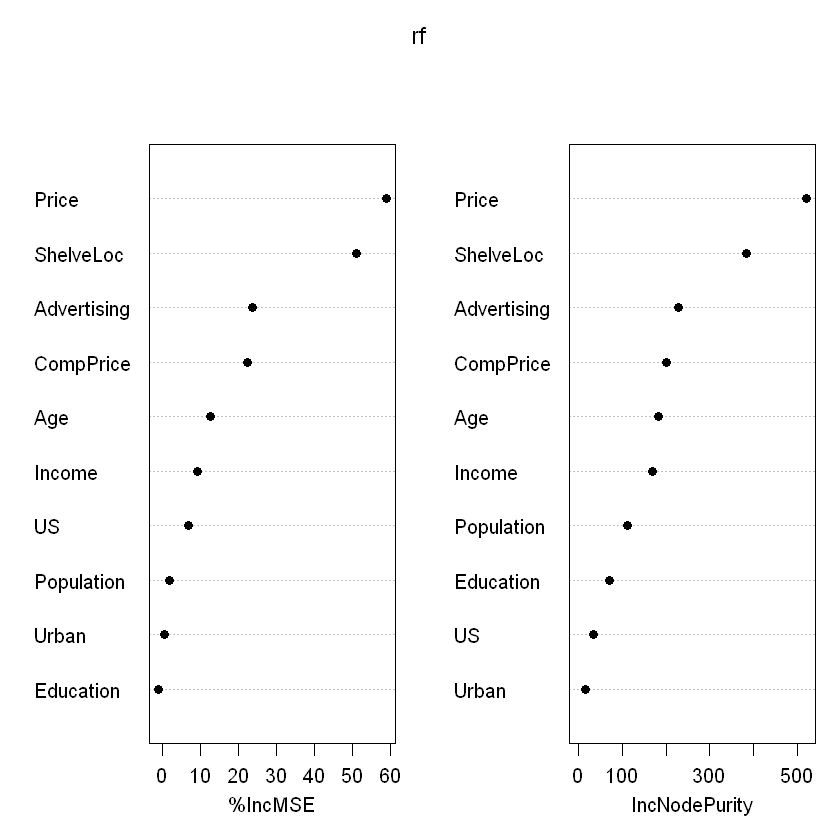

In [153]:
rf$importance
varImpPlot(rf , pch=16)

- IncNodePurity : split 시 순수도 증가량 
- %IncMSE : OOB 샘플을 임의화 한 차이

=> 클수록 해당 변수가 중요한 것임(Price , ShelveLoc 중요)

In [154]:
rf$importanceSD

CompPrice      Income Advertising  Population       Price   ShelveLoc 
0.032635642 0.028480114 0.036257193 0.021724552 0.065497124 0.061182133 
        Age   Education       Urban          US 
0.029936638 0.017618722 0.008072641 0.015904494

- 임의화 작업 시 분산

#### 변수를 뽑는 개수 변화시키기

In [167]:
rf = randomForest(Sales ~. , data = train_dt ,ntree=1000,  mtry =4 , importance =TRUE,
                 xtest = test_dt[,-1] , ytest = test_dt$Sales) 

In [170]:
mtry_rf = function(m){
    return(randomForest(Sales ~. , data = train_dt , mtry =m , xtest = test_dt[,-1] , ytest = test_dt$Sales)$test$mse) }

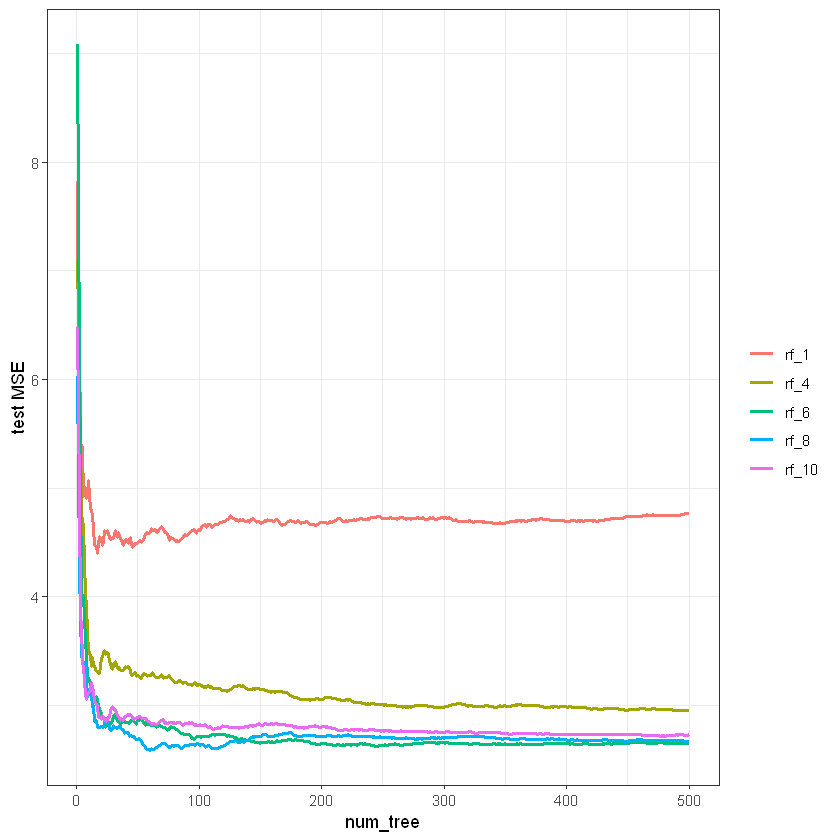

In [175]:
tmp_dt <- data.table( num_tree = 1:500,
                      rf_1 = mtry_rf(1),
                      rf_4 = mtry_rf(4),
                      rf_6 = mtry_rf(6),
                      rf_8 = mtry_rf(8),
                      rf_10 = mtry_rf(10))

melt.tmp <- melt(tmp_dt, id=1)

ggplot(melt.tmp, aes(num_tree, value, col=variable)) + 
  geom_line(lwd=1) +
  labs(y='test MSE', col="") + theme_bw()

- 변수를 뽑는 개수가 6일 때 test MSE가 가장 작을 것이다.

In [178]:
rf = randomForest(Sales ~. , data = train_dt ,ntree=200,  mtry =6 , importance =TRUE,
                 xtest = test_dt[,-1] , ytest = test_dt$Sales) 
mean(rf$test$mse)

[1] 2.800164

- test MSE가 2.8로 가장 작으므로 최종모형으로 선택한다. 

---

### 4. `OJ.csv` 데이터를 이용한 모형 적합

In [179]:
OJ = read.csv("OJ.csv")  ## 데이터 불러오기
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [182]:
str(OJ)
# ?OJ

'data.frame':	1070 obs. of  18 variables:
 $ Purchase      : chr  "CH" "CH" "CH" "MM" ...
 $ WeekofPurchase: int  237 239 245 227 228 230 232 234 235 238 ...
 $ StoreID       : int  1 1 1 1 7 7 7 7 7 7 ...
 $ PriceCH       : num  1.75 1.75 1.86 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceMM       : num  1.99 1.99 2.09 1.69 1.69 1.99 1.99 1.99 1.99 1.99 ...
 $ DiscCH        : num  0 0 0.17 0 0 0 0 0 0 0 ...
 $ DiscMM        : num  0 0.3 0 0 0 0 0.4 0.4 0.4 0.4 ...
 $ SpecialCH     : int  0 0 0 0 0 0 1 1 0 0 ...
 $ SpecialMM     : int  0 1 0 0 0 1 1 0 0 0 ...
 $ LoyalCH       : num  0.5 0.6 0.68 0.4 0.957 ...
 $ SalePriceMM   : num  1.99 1.69 2.09 1.69 1.69 1.99 1.59 1.59 1.59 1.59 ...
 $ SalePriceCH   : num  1.75 1.75 1.69 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceDiff     : num  0.24 -0.06 0.4 0 0 0.3 -0.1 -0.16 -0.16 -0.16 ...
 $ Store7        : chr  "No" "No" "No" "No" ...
 $ PctDiscMM     : num  0 0.151 0 0 0 ...
 $ PctDiscCH     : num  0 0 0.0914 0 0 ...
 $ ListPriceDiff : 

| 변수 | 설명 | 
|-| - | 
|`Purchase` | Citrus Hill / Minute Maid의 오렌지 주스 구매|  | 
|`WeekofPurchase` |구매한 주 |
|`StoreID` | 가게의 ID | 
|`PriceCH` | CH에 청구된 가격 | 
|`PriceMM` | MM에 청구된 가격 | 
|`DiscCH` | CH에서 할인 제공 여부 | 
|`DiscMM` | MM에서 할인 제공 여부|
|`SpecialCH` | CH에서 특별 표시기 |
|`SpecialMM` | MM에서 특별 표시기 |
|`LoyalCH` | CH에 대한 고객 브랜드 충성도 |
|`SalePriceCH` | CH에서 판매 가격 |
|`SalePriceMM` | MM에서 판매 가격  |
|`PriceDiff` | MM의 판매가  - CH의 판매가 | 
|`Store7` | store7에 있는지 여부|
|`PctDiscCH` | CH에서 할인율|
|`PctDiscMM` | MM에서 할인율|
|`ListPriceDiff` | MM의 정가 - CH의 정가|
|`Store` | 판매가 발생한 매장|

In [232]:
sum(is.na(OJ))  ## NA 없음

[1] 0

#### (a) 800개의 training data , 나머지 testing data 구분

In [234]:
set.seed(1000)

In [235]:
train_id = sample(1:nrow(OJ) , 800)

In [236]:
train_dt = OJ[train_id,]
test_dt = OJ[-train_id,]

#### (b) training data로 tree 적합

In [203]:
tree = rpart(Purchase ~. , data = train_dt,
             control = rpart.control(cp=0.01 , minsplit=1))
tree

n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 800 308 CH (0.6150000 0.3850000)  
   2) LoyalCH>=0.5036 447  56 CH (0.8747204 0.1252796)  
     4) PriceDiff>=-0.39 422  41 CH (0.9028436 0.0971564) *
     5) PriceDiff< -0.39 25  10 MM (0.4000000 0.6000000) *
   3) LoyalCH< 0.5036 353 101 MM (0.2861190 0.7138810)  
     6) LoyalCH>=0.2761415 183  79 MM (0.4316940 0.5683060)  
      12) PriceDiff>=0.05 105  42 CH (0.6000000 0.4000000)  
        24) WeekofPurchase>=249 68  21 CH (0.6911765 0.3088235) *
        25) WeekofPurchase< 249 37  16 MM (0.4324324 0.5675676) *
      13) PriceDiff< 0.05 78  16 MM (0.2051282 0.7948718) *
     7) LoyalCH< 0.2761415 170  22 MM (0.1294118 0.8705882) *

- 터미널 노드가 6개
- 분리규칙 5개

In [208]:
yhat = predict(tree , newdata = train_dt , type='class')
mean(yhat!=train_dt$Purchase) ## traing error (오분류율)

[1] 0.1575

- training error : 0.1575

In [198]:
tree$variable.importance  ## 변수 중요도

LoyalCH        StoreID      PriceDiff    SalePriceMM WeekofPurchase 
    152.773088      31.990304      26.845813      20.742329      18.694812 
       PriceMM         DiscMM      PctDiscMM  ListPriceDiff        PriceCH 
     17.150000      14.317628      14.317628      13.421922      13.055950 
   SalePriceCH          STORE 
      3.990230       3.789584

#### (c) tree의 그림을 그리고 결과 설명

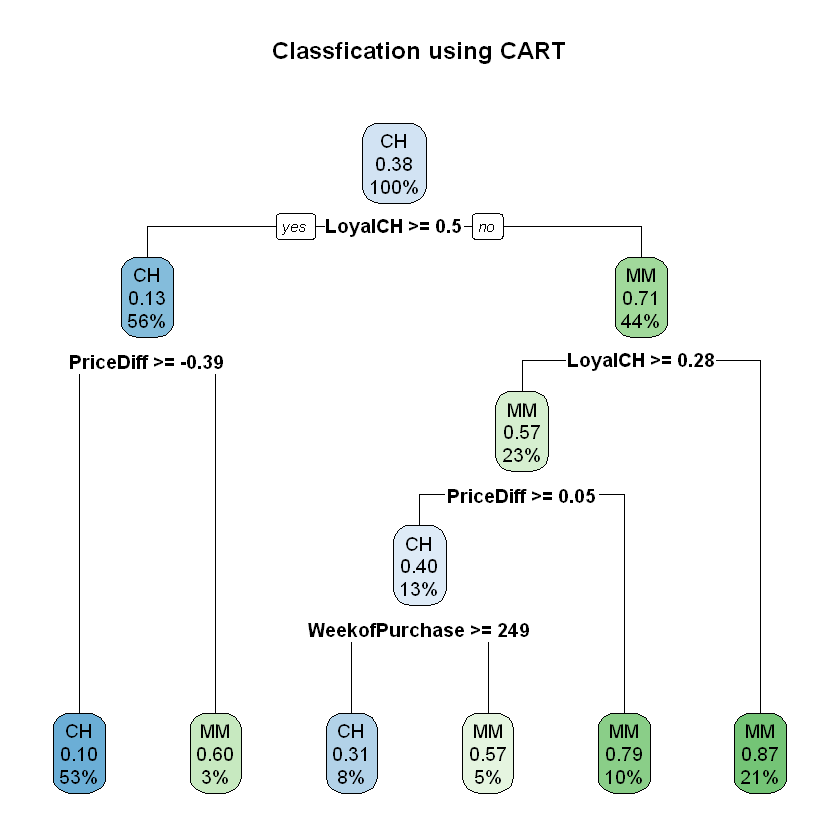

In [204]:
rpart.plot(tree , main = "Classfication using CART")

- LoyalCH , PriceDiff , WeekofPurchase 변수가 모형에 사용되었다.
- 각 노드에 분류 비율이 높은 값이 써져있음

#### (d) testing data로 예측 , 혼동행렬 생성

In [226]:
yhat = predict(tree , newdata = test_dt , type='class')
mean(yhat!=test_dt$Purchase) ## test error (오분류율)

[1] 0.1925926

In [212]:
table(yhat , test_dt$Purchase) ## confusion matrix

    
yhat  CH  MM
  CH 139  30
  MM  22  79

- test error는 0.19이다.

#### (e) cptable 및 그림을 이용햐여 최적의 tree 구하기

,CP,nsplit,rel error,xerror,xstd
1,0.49025974,0,1.0000000,1.0000000,0.04468505
2,0.03409091,1,0.5097403,0.5357143,0.03715636
3,0.01623377,3,0.4415584,0.5292208,0.03698859
4,0.01000000,5,0.4090909,0.5000000,0.03620603


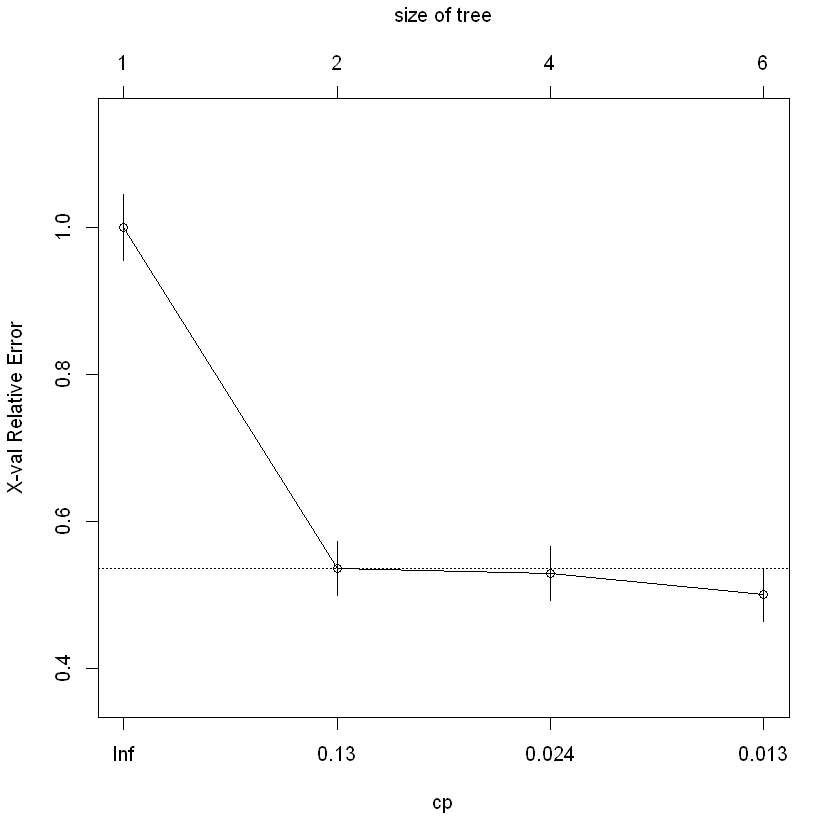

In [216]:
tree$cptable ## complexity parameter
plotcp(tree)

In [217]:
0.5000000 + 0.03620603  # min(xerror) + std(min(xerror))

[1] 0.536206

- 제일 작은 xerror에 std를 더하면 0.536이고, 0.536은 xerror 0.5357143~1 사이에 있으므로 CP는 0.03409091 ~ 0.49025974 값 중 아무거나 설정해주면 된다.  
- CP = 0.2

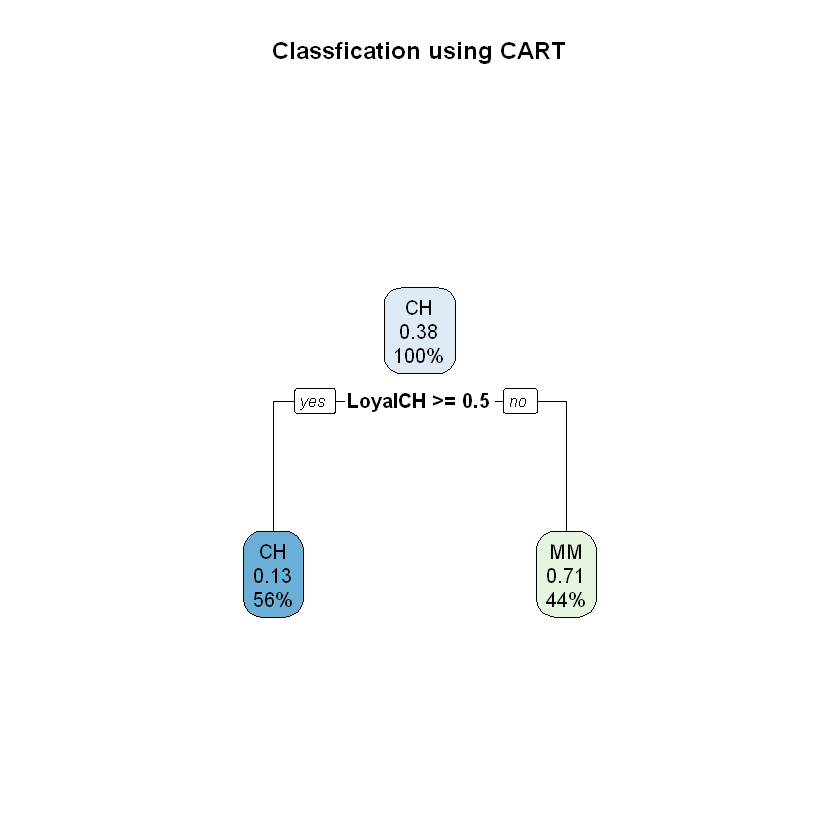

In [222]:
prune_tree = rpart(Purchase ~. , data = train_dt,
             control = rpart.control(cp=0.2 , minsplit=1))
rpart.plot(prune_tree, main = "Classfication using CART")

- terminal node 개수 : 2개
- 각 노드에 더 많이 분류된 값 쓰여있음

In [223]:
prune_tree

n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 800 308 CH (0.6150000 0.3850000)  
  2) LoyalCH>=0.5036 447  56 CH (0.8747204 0.1252796) *
  3) LoyalCH< 0.5036 353 101 MM (0.2861190 0.7138810) *

#### (f) 가지치기 전/후 tree의 training error 비교

In [230]:
yhat = predict(prune_tree , newdata = train_dt , type='class')
head(yhat)
mean(yhat!=train_dt$Purchase) ## traing error (오분류율)

1008  580  214  344  402  406 
  MM   MM   CH   CH   MM   MM 
Levels: CH MM

[1] 0.19625

- training error가 0.1575에서 가지치기 후 0.1962로 증가했다.

#### (g) 가지치기 전/후 tree의 test error 비교

In [231]:
yhat = predict(prune_tree , newdata = test_dt , type='class')
head(yhat)
mean(yhat!=test_dt$Purchase) ## test error (오분류율)

11 12 13 14 16 17 
CH CH CH CH CH MM 
Levels: CH MM

[1] 0.2111111

- test error가 0.1925에서 가지치기 후 0.2111로 증가했다.